In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [ ]:
df_raw = pd.read_csv("data/215379/WQBSLWQ.csv", low_memory=False)
df_raw["Temp"].dropna(inplace=True)
df_raw["F_Temp"] = df_raw["Temp"].apply(lambda x: x * 9/5 + 32)

df = df_raw[["F_Temp", 'DateTimeStamp']].copy()

df['DateTimeStamp'] = pd.to_datetime(df['DateTimeStamp'])
df['year'] = df['DateTimeStamp'].dt.year
df['month'] = df['DateTimeStamp'].dt.month
df['day'] = df['DateTimeStamp'].dt.day
df['time'] = df['DateTimeStamp'].dt.time
df.head()


In [ ]:
agg_df = df.groupby(by=["year", "month"])["F_Temp"].mean().round(2).reset_index()
plt.figure(figsize=(12, 6))
for year in agg_df['year'].unique():
    if year > 2015:
        monthly_data = agg_df[agg_df['year'] == year]
        plt.plot(monthly_data['month'], monthly_data['F_Temp'], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import cm
from matplotlib import colors as mcolors

df_subset = df[df["month"] == 3]
df_subset = df_subset.reset_index()

unique_years = np.unique(df_subset["year"])
cmap = cm.get_cmap("tab10", len(unique_years))
color_mapping = {year: cmap(i) for i, year in enumerate(unique_years)}
colors = df_subset["year"].map(color_mapping)

plt.figure(figsize=(12, 6))
plt.scatter(df_subset["day"], df_subset["F_Temp"], c=colors, marker=".")
plt.xlabel("Day")
plt.xticks(range(1, 32))
plt.grid(True)

norm = mcolors.Normalize(vmin=min(df_subset["year"]), vmax=max(df_subset["year"]))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# plt.colorbar(sm, label='Year')

plt.show()

In [ ]:
df[((df["month"] == 4) & (0 < df["day"]) & (df["day"] < 7)) & (df["year"] > 2020)]["F_Temp"].mean()

In [97]:
def ema(x: pd.Series, a): return sum(a*(1-a)**i * float(elem) for i, elem in enumerate(x))
df["ema"] = df["F_Temp"].rolling(window=10).apply(lambda x: ema(x, 0.2))


In [ ]:

df["Special"] = df["F_Temp"].rolling(window=10).apply(lambda x: ema(x, 0.2))


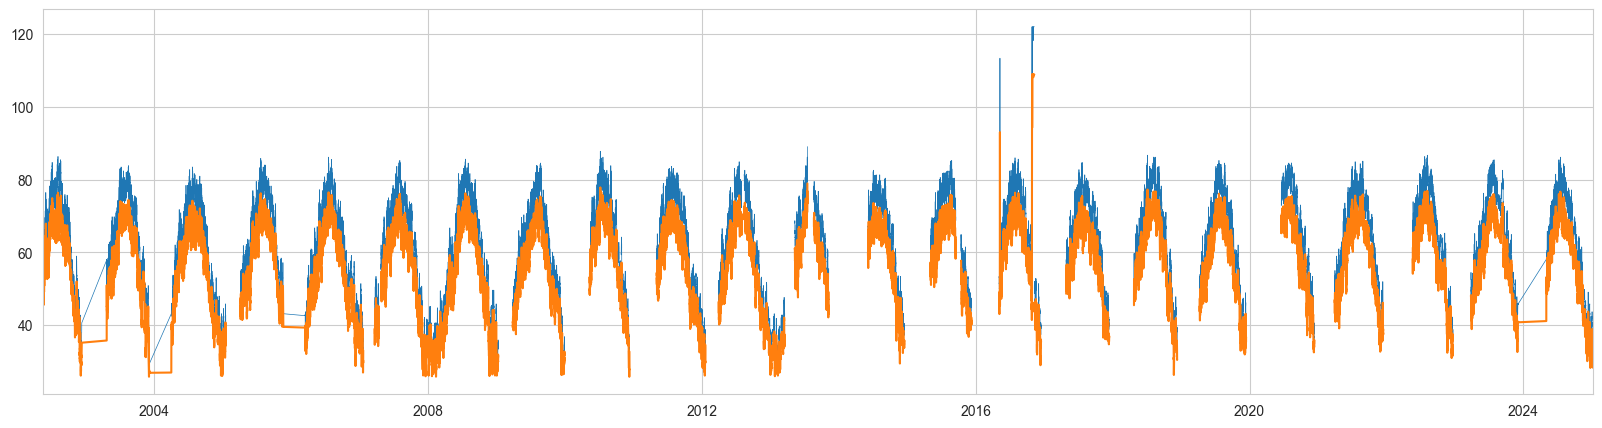

In [98]:


plt.figure(figsize=(20,5))
ax = plt.gca()
ax.set_xlim([df['DateTimeStamp'].min(), df['DateTimeStamp'].max()])

plt.plot(df['DateTimeStamp'], df["F_Temp"], lw=0.5)
plt.plot(df['DateTimeStamp'], df["Special"])
plt.show()

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

decompose_result = seasonal_decompose(df["F_Temp"],model='multiplicative')

ValueError: This function does not handle missing values